# Chess Puzzles Data Analysis

### Key terms

1. **Chess puzzle:** This is essentially a key moment in a chess game. Chess puzzles are won by finding the best sequence of moves in a given chess position, testing the same calculation, spatial awareness, and pattern-recognition skills used in real games. One may analyze chess puzzles as an alternative to analyzing complete games, considering how similar they are to actual games.

2. **Theme:** This term refers to the tactics used, e.g. sacrifice, fork, etc., the stage of the game where the position occurs, e.g. opening, endgame, etc., and the motive behind the moves, e.g. gain an advantage, equalize, etc., among other things.


### Finding the data

I started my search from the [Dataset Finder](https://dataset-finder.netlify.app/) which showed me to Lichess's open database on [database.lichess.org](https://database.lichess.org). I have downloaded the .csv present on https://database.lichess.org/#puzzles into the root of this .ipynb file.

Required installations

In [ ]:
# importing required packages

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!pip install dotenv

In [ ]:
from openai import OpenAI
import os
from dotenv import load_dotenv

Exploring the data

In [ ]:
# reading the .csv file

df = pd.read_csv('lichess_db_puzzle.csv')

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74192 entries, 0 to 74191
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PuzzleId         74192 non-null  object
 1   FEN              74192 non-null  object
 2   Moves            74192 non-null  object
 3   Rating           74192 non-null  int64 
 4   RatingDeviation  74192 non-null  int64 
 5   Popularity       74192 non-null  int64 
 6   NbPlays          74192 non-null  int64 
 7   Themes           74192 non-null  object
 8   GameUrl          74192 non-null  object
 9   OpeningTags      15290 non-null  object
dtypes: int64(4), object(6)
memory usage: 5.7+ MB


,PuzzleId,FEN,Moves,Rating,RatingDeviation,Popularity,NbPlays,Themes,GameUrl,OpeningTags
0,00008,r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...,f2g3 e6e7 b2b1 b3c1 b1c1 h6c1,1978,77,95,8125,crushing hangingPiece long middlegame,https://lichess.org/787zsVup/black#48,NaN
1,0000D,5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...,d3d6 f8d8 d6d8 f6d8,1523,73,96,32780,advantage endgame short,https://lichess.org/F8M8OS71#53,NaN
2,0008Q,8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64,e7f7 f5e5 e2f1 e5e6,1371,76,91,718,advantage endgame rookEndgame short,https://lichess.org/MQSyb3KW#127,NaN
3,0009B,r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...,b6c5 e2g4 h3g4 d1g4,1121,74,87,593,advantage middlegame short,https://lichess.org/4MWQCxQ6/black#32,Kings_Pawn_Game Kings_Pawn_Game_Leonardis_Vari...
4,000VW,r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...,g6f5 d5c5 c2e4 h5g5 g7h8 g5f6,2854,107,85,257,crushing endgame long,https://lichess.org/e9AY2m5j/black#50,NaN


<Axes: ylabel='Density'>

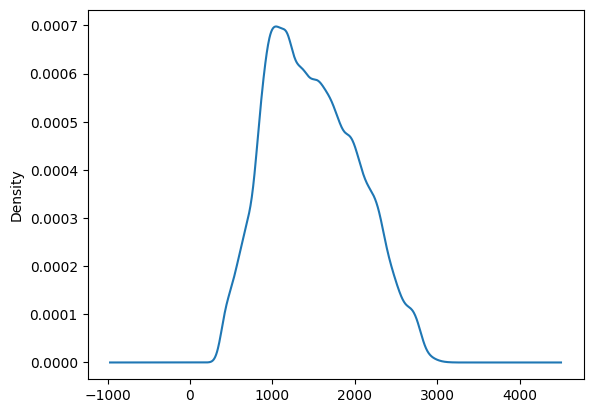

In [ ]:
df['Rating'].plot.kde()

### Research question

Can one identify which tactics/typical endgame/strategies or 'themes' are most common at their level of expertise?

This may help them streamline their approach for improving their win percentage.

### Hypotheses

**Null hypothesis:** The frequency distribution of themes in puzzles rated >=2000 is the same as that than in lower-rated ones.

**Alternative hypothesis:** There are certain themes more commonly present in puzzles rated >=2000 than in lower-rated ones.

### Methodology

I should plot a bar plot of theme word frequency distribution grouped by the rating group of puzzles for a visual interpretation of which hypothesis is most likely to be true post-statistical analysis.

To create individual bars for each theme word, I will need a list of the unique theme words appearing in `df['Themes']`. Since `df['Themes']` may contain multiple theme words for the puzzle, I will need to split the values in `df['Themes']` to find the unique words.

Finding unique theme words

In [ ]:
unique_words = set()
for theme in df['Themes']:
    for word in str(theme).split(" "):
        unique_words.add(word)

unique_words

{'advancedPawn',
 'advantage',
 'anastasiaMate',
 'arabianMate',
 'attackingF2F7',
 'attraction',
 'backRankMate',
 'bishopEndgame',
 'bodenMate',
 'capturingDefender',
 'castling',
 'clearance',
 'crushing',
 'defensiveMove',
 'deflection',
 'discoveredAttack',
 'doubleBishopMate',
 'doubleCheck',
 'dovetailMate',
 'enPassant',
 'endgame',
 'equality',
 'exposedKing',
 'fork',
 'hangingPiece',
 'hookMate',
 'interference',
 'intermezzo',
 'killBoxMate',
 'kingsideAttack',
 'knightEndgame',
 'long',
 'master',
 'masterVsMaster',
 'mate',
 'mateIn1',
 'mateIn2',
 'mateIn3',
 'mateIn4',
 'mateIn5',
 'middlegame',
 'oneMove',
 'opening',
 'pawnEndgame',
 'pin',
 'promotion',
 'queenEndgame',
 'queenRookEndgame',
 'queensideAttack',
 'quietMove',
 'rookEndgame',
 'sacrifice',
 'short',
 'skewer',
 'smotheredMate',
 'superGM',
 'trappedPiece',
 'underPromotion',
 'veryLong',
 'vukovicMate',
 'xRayAttack',
 'zugzwang'}

Finding frequency distribution of themes in higher-rated puzzles

In [ ]:
high_rated_puzzles = df[df['Rating'] >= 2000]

# initialize pd.DataFrame

counts_themes_high_rated = pd.DataFrame(columns=['Frequency'], index=list(unique_words))

# assign mean rating by theme

for word in unique_words:
    filtered_df = high_rated_puzzles[high_rated_puzzles['Themes'].str.contains(word, na=False)]
    counts_themes_high_rated.loc[word, 'Frequency'] = len(filtered_df) / len(high_rated_puzzles)

counts_themes_high_rated.head()

,Frequency
attackingF2F7,0.004058
advancedPawn,0.090011
advantage,0.386421
backRankMate,0.000271
kingsideAttack,0.054845


Finding frequency distribution of theme words in lower-rated puzzles

In [ ]:
low_rated_puzzles = df[df['Rating'] < 2000]

# initialize pd.DataFrame

counts_themes_low_rated = pd.DataFrame(columns=['Frequency'], index=list(unique_words))

# assign mean rating by theme

for word in unique_words:
    filtered_df = low_rated_puzzles[low_rated_puzzles['Themes'].str.contains(word, na=False)]
    counts_themes_low_rated.loc[word, 'Frequency'] = len(filtered_df) / len(low_rated_puzzles)

counts_themes_low_rated.head()

,Frequency
attackingF2F7,0.008164
advancedPawn,0.052975
advantage,0.268176
backRankMate,0.041714
kingsideAttack,0.091878


Comparing counts using a grouped bar graph

In [ ]:
counts_themes_high_rated['RatingGroup'] = 'High'
counts_themes_low_rated['RatingGroup'] = 'Low'

counts_themes_low_rated['Theme'] = counts_themes_low_rated.index
counts_themes_high_rated['Theme'] = counts_themes_high_rated.index

counts_themes_low_rated = counts_themes_low_rated.reset_index(drop=True)
counts_themes_high_rated = counts_themes_high_rated.reset_index(drop=True)

combined_counts_themes = pd.concat([counts_themes_high_rated, counts_themes_low_rated], ignore_index=True)
combined_counts_themes = combined_counts_themes.dropna(axis=0)

combined_counts_themes.head()

,Frequency,RatingGroup,Theme
0,0.004058,High,attackingF2F7
1,0.090011,High,advancedPawn
2,0.386421,High,advantage
3,0.000271,High,backRankMate
4,0.054845,High,kingsideAttack


Creating frequency distributions of rating groups for each theme

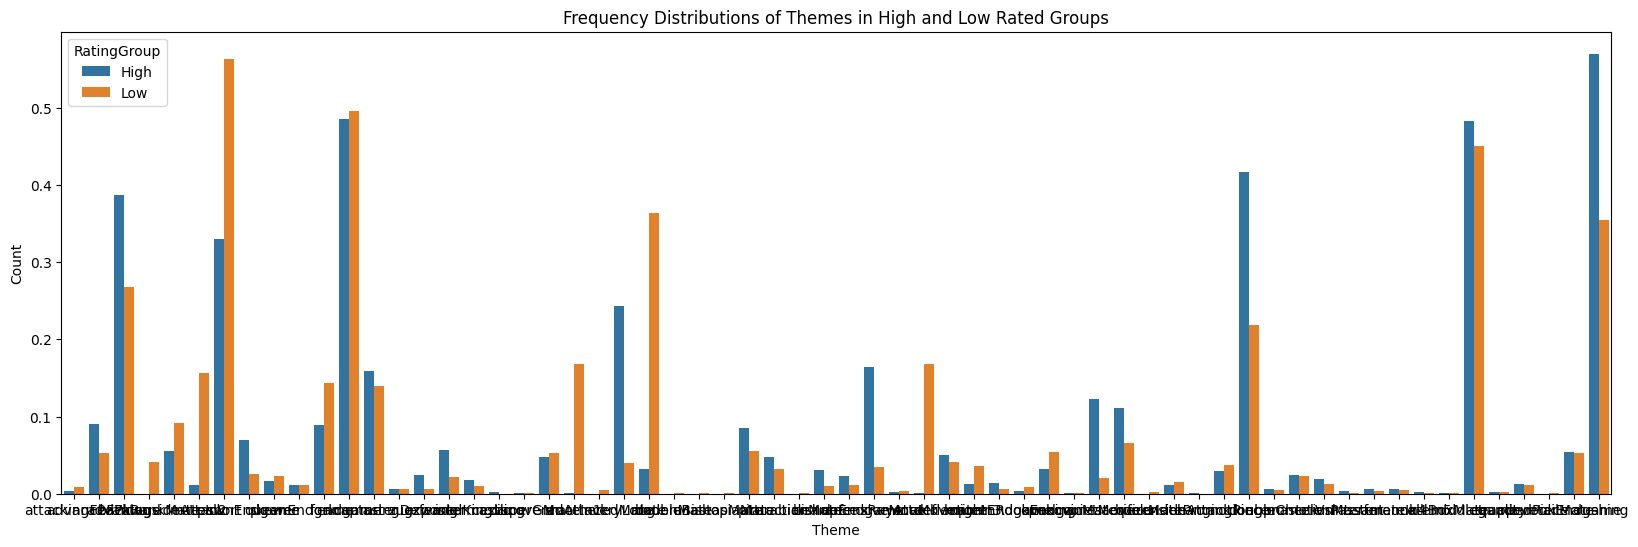

In [ ]:
fig, ax = plt.subplots(figsize=(20, 6))

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes, ax=ax)
ax.set_xlabel('Theme')
ax.set_ylabel('Count')
ax.set_title('Frequency Distributions of Themes in High and Low Rated Groups')
plt.show()

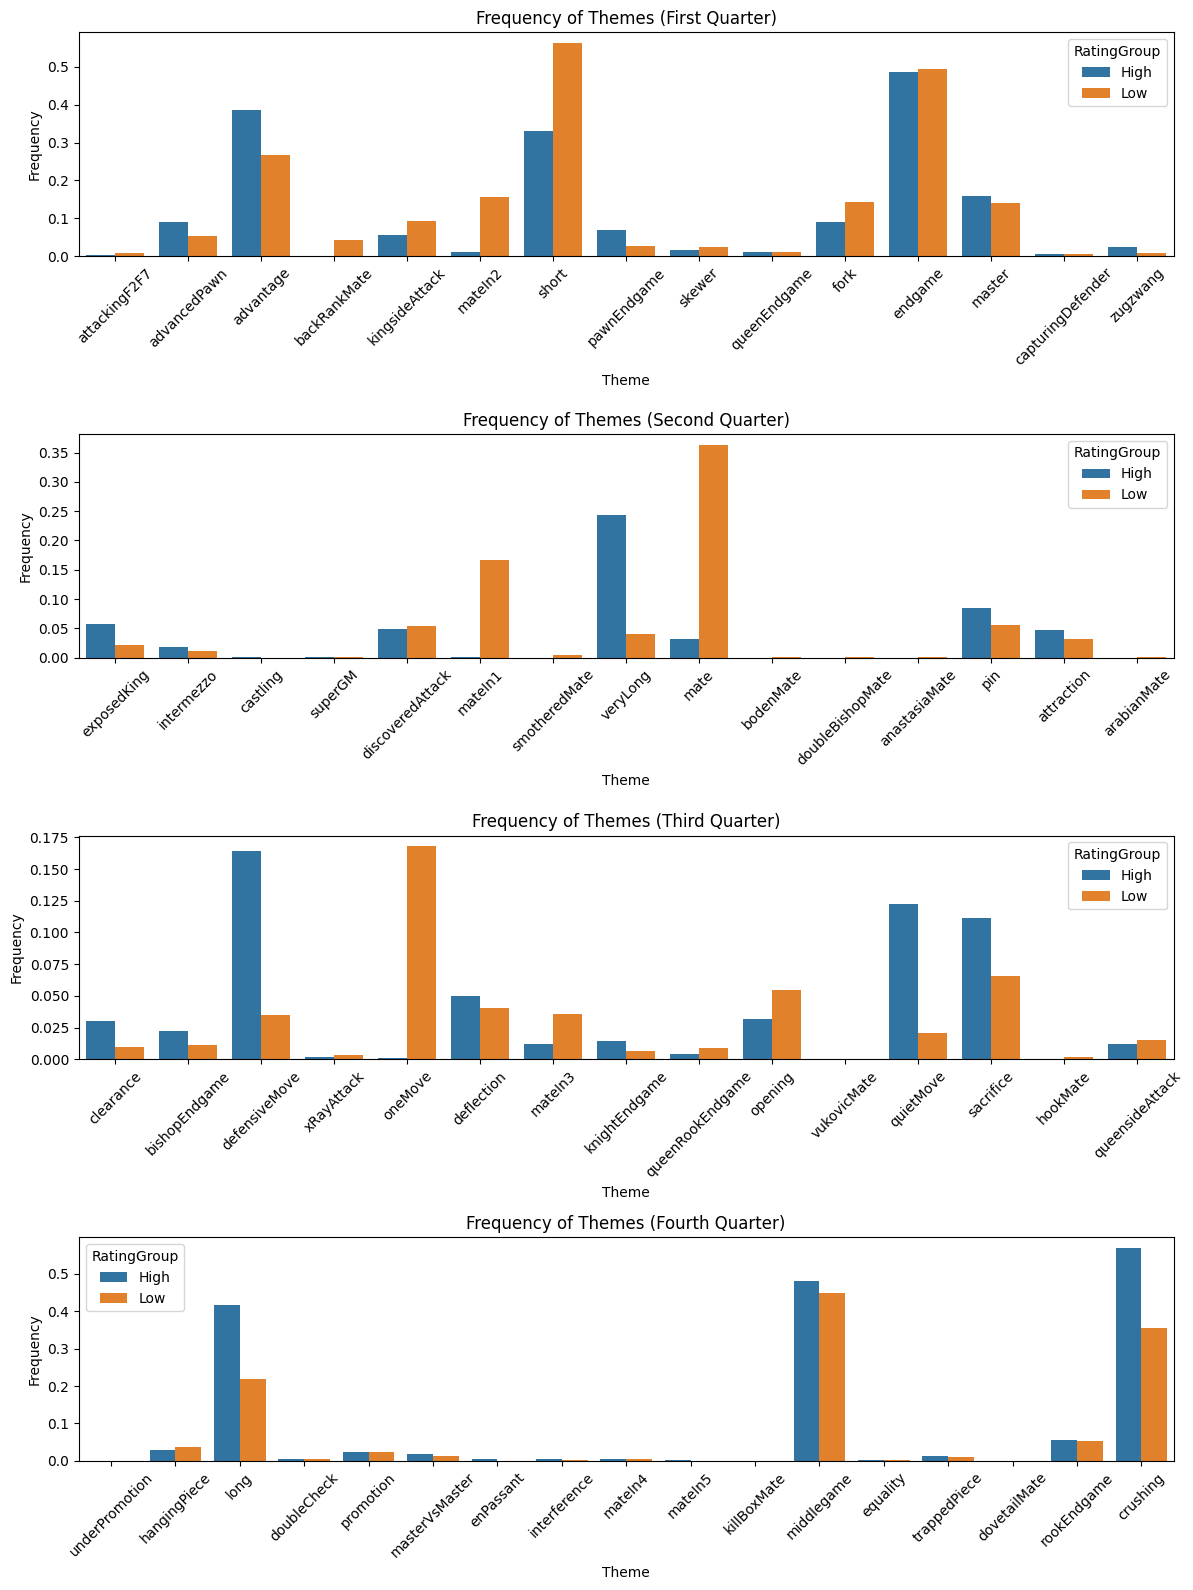

In [ ]:
# splitting the combined counts of themes between into dataframes
# since a single grouped bar graph for the combined counts of themes is overcrowded on the x-axis

themes = combined_counts_themes['Theme'].unique()
quarter_length = len(themes) // 4
themes_quarter1 = themes[:quarter_length]
themes_quarter2 = themes[quarter_length:quarter_length*2]
themes_quarter3 = themes[quarter_length*2:quarter_length*3]
themes_quarter4 = themes[quarter_length*3:]

combined_counts_themes_quarter1 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter1)]
combined_counts_themes_quarter2 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter2)]
combined_counts_themes_quarter3 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter3)]
combined_counts_themes_quarter4 = combined_counts_themes[combined_counts_themes['Theme'].isin(themes_quarter4)]

fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 16))

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter1, ax=axes[0])
axes[0].set_title('Frequency of Themes (First Quarter)')
axes[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter2, ax=axes[1])
axes[1].set_title('Frequency of Themes (Second Quarter)')
axes[1].tick_params(axis='x', rotation=45)

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter3, ax=axes[2])
axes[2].set_title('Frequency of Themes (Third Quarter)')
axes[2].tick_params(axis='x', rotation=45)

sns.barplot(x='Theme', y='Frequency', hue='RatingGroup', data=combined_counts_themes_quarter4, ax=axes[3])
axes[3].set_title('Frequency of Themes (Fourth Quarter)')
axes[3].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Automating identification of theme words significantly more likely to be present in high-rated puzzles than in low-rated puzzles

---



In [ ]:
# If frequency of a theme word in high-rated puzzles is at least 1.5 times that in low-rated puzzles,
# it is said to 'appear' more likely to be present in high-rated puzzles than in low-rated puzzles.
# This is not a substitute for a statistical analysis

significantly_more_likely_in_high_rated = []

for word in unique_words:
  high_freq = counts_themes_high_rated[counts_themes_high_rated['Theme'] == word]['Frequency'].iloc[0]
  low_freq = counts_themes_low_rated[counts_themes_low_rated['Theme'] == word]['Frequency'].iloc[0]

  if high_freq >= 1.5 * low_freq:
    significantly_more_likely_in_high_rated.append(word)

print(significantly_more_likely_in_high_rated)
print(len(significantly_more_likely_in_high_rated))

['advancedPawn', 'pawnEndgame', 'zugzwang', 'exposedKing', 'intermezzo', 'castling', 'veryLong', 'pin', 'clearance', 'bishopEndgame', 'defensiveMove', 'knightEndgame', 'quietMove', 'sacrifice', 'underPromotion', 'long', 'masterVsMaster', 'enPassant', 'interference', 'mateIn5', 'crushing']
21


### Results

It appears there are around 21 theme words more likely to be present in puzzles rated >=2000 than in lower-rated puzzles including 'interference' and 'sacrifice.'

### Conclusion

The null hypothesis would likely be rejected post-statistical analysis.

An application of this result for players trying to cross the 2000 rating would be to place more emphasis on looking for moves aligned with these theme words in their gameplay.

To improve this project, I can perform statistical analysis for a reliable determination of which themes, if any, appear *significantly* more likely in one puzzle group. I should also look for other strong determinants of puzzle difficulty rating.